# Web Visualization Module 2: Twitter Scraping

## 1. Intro

intro text

## 2. Importing Libraries

### Unveil The Power Of Twitter APIs
Twitter provides an API that facilitates downloading twitter data in large patches. Twitter data includes, but not limited to, tweets, users, followers, interactions, etc. In this assignment, we will learn how to use twitter APIs to gain more insight about twitter data. This insight goes far beyond what you see on the web interface.

## Setup

### Python libraries
We will first install the python libraries we will use for this assignment. Just run the code below.

In [2]:
!pip install tweepy
!pip install textblob
!pip install plotly
!pip install nltk

### Using Twitter APIs.
In order to use Twitter APIs, you need two things: twitter account and twitter keys.

Follow these instructions to get your keys:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
2. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.
3. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
4. On the page for that application, find your Consumer Key and Consumer Secret.
5. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.

### Security concern
Don’t share your access keys with anyone. Your access keys can be used to manage your account.

### Twitter API credentials
Add your credential to your program. Again, don’t share these credentials with anyone.

In [8]:
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

**Important note about rate limit**: Twitter APIs has a rate limit for every 15 minutes. Use your requests wisely to avoid unnecessary waiting time. The actual number of requests per window may be different based on the request, read more about Rate Limit.

Now that everything is set up, we can use [search api](https://dev.twitter.com/rest/reference/get/search/tweets) to find the word Berkeley. This is the equivalent for this nice [page](https://twitter.com/search?q=berkeley).

In [7]:
# search all twitter
results = tweepy.Cursor(api.search, 
                        q='Berkeley', # query, any word you want found in a tweet
                        result_type = 'recent',
                       ).items(10)

The object `results` is a cursor, so you need to iterate through it to get the actual data.

In [10]:
results_tweets = []

for t in results:
    results_tweets.append(t)

We have a lot of data now. Let's see how much:

In [12]:
print(len(results_tweets))

10


Now let's look at what the data looks like:

In [33]:
print(results_tweets)

Let’s inspect the first tweet:

In [34]:
print(results_tweets[0])

## Exploring the dataset
Twitter gives us a lot of information about each tweet, not just its text. You can read the full documentation [here](https://dev.twitter.com/overview/api/tweets). Look at one tweet to get a sense of the information we have available.

#### Question 1
Which fields contains:
1. the actual text of a tweet,
2. the time when the tweet was posted, 
3. the geographic location of the Tweet,
4. the source (device and app) from which the tweet was posted?


To answer the question, write functions that extract each field from a tweet. (Each one should take a single Status object as its argument.)

In [15]:
print(results_tweets[0].created_at)
print()
print(results_tweets[0].text)
print()
print(results_tweets[0].retweet_count)
print()
print(results_tweets[0].entities['user_mentions'])
print()
print(results_tweets[0].entities['hashtags'])
print()
print(results_tweets[0].entities['urls'])
print()
print(results_tweets[0].user.profile_image_url_https)
print()
print(results_tweets[0].geo)

2017-09-01 04:05:48

RT @PrisonPlanet: Lesson...

Hitting people with bike locks doesn't give you the moral high ground.

It gives you 40 years jail time.

http…

4543

[{'id_str': '18643437', 'name': 'Paul Joseph Watson', 'screen_name': 'PrisonPlanet', 'id': 18643437, 'indices': [3, 16]}]

[]

[]

https://pbs.twimg.com/profile_images/900307482865672192/gcZEqdnP_normal.jpg

None


**Answer**: 
1. 
2. 
3. 
4. 

Now, let’s gain some insight from the data. Get a list of retweet counts for all the tweets

In [17]:
retweet_counts = []

for t in results_tweets:
    retweet_counts.append(t.retweet_count)
    
print(retweet_counts)

[4543, 0, 1, 3214, 1054, 15, 1, 34, 0, 0]


Let's try and draw it:

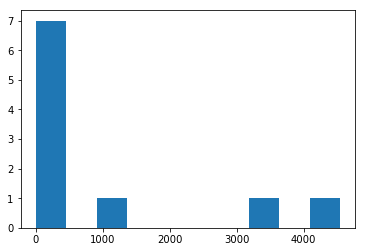

In [19]:
import matplotlib.pyplot as plt
plt.hist(retweet_counts)
plt.show()

Twitter search api provides three modes (check out this guide) for the result_type: mix, recent, and popular. In the previous code, we retrieved the popular tweets. 
Now it is your turn to retrieve recent 100 tweets and assign them to a new variable (e.g., results_recent100), then plot a histogram for the retweet count of the recent 100 tweets. 


#### Question 2 
Compare and contrast between the two histograms for retweet counts of recent and popular 100 tweets that returns from searching the word Berkeley. 


**Answer**: 

#### Question 3.
Twitter search api has an option to limit the search by geo location. The parameter value is specified by ”latitude,longitude,radius”. Compare the top 10 popular tweets text from four geo locations: Berkeley, Kansas City, New York, and Barcelona Spain.


**Answer**: 

### User handles
Instead of searching for tweets, you can use Twitter APIs to get details about specific user account. It includes user’s timeline, followers, etc.

Get the latest 10 tweets from an account that interests you (e.g.,  UCBerkeley) twitter account using the following code.

In [20]:
handle_results = api.user_timeline(screen_name='UCBerkeley', count=10)

handle_results_tweets = []

for t in handle_results:
    handle_results_tweets.append(t)

In [21]:
#print the test of the first 10 tweets
for t in handle_results_tweets:
    print(t.created_at.strftime("%Y-%b-%d %H:%M"))
    print(t.text)
    print()

2017-Sep-01 03:02
NEXT WEEK: 50 years of protest photos to open @ucbsoj https://t.co/A6pvEsWERd j https://t.co/GQzQ4Ptybf

2017-Sep-01 02:07
Distant galaxy sends out 15 high-energy radio bursts https://t.co/v01bqRNumR https://t.co/BY99a6IDk9

2017-Sep-01 01:03
BLOG: On sexism in economics https://t.co/AlzpF6SqWT https://t.co/SjwTRyZRGb

2017-Aug-31 23:54
RT @berkeleyforum: Join us tonight at 6:00 PM in 112 Wurster as The Berkeley Forum hosts new Chancellor Carol Christ. https://t.co/ZTYYHAVM…

2017-Aug-31 22:04
BLOG: Working outside the #tech bubble https://t.co/8jgkESKfuD #startup https://t.co/51jJkuoh27

2017-Aug-31 19:02
BLOG: #Houston, we all have a problem https://t.co/bd3ODC2oQT #Harvey https://t.co/YVpuXhr9mQ

2017-Aug-31 17:02
FRIDAY: Campus memorial Friday for chief counsel Chris Patti https://t.co/TGNfellJUg https://t.co/DxYQEeAGt5

2017-Aug-31 16:04
Girls’ #STEM camp connects with campus https://t.co/b2UrYFdleK #girlsinstem https://t.co/VJQO9Omlwd

2017-Aug-31 07:04
More tha

#### Question 4
Look at the text of retrieved tweets and compare them to the latest 10 tweets of the [web interface](https://twitter.com/UCBerkeley) for the same user. Do you see any difference? 

**Answer**: 

Get a list of a followers for UCBerkeley.

In [40]:
followers_list = []

followers_results = api.followers(screen_name='UCBerkeley', count=200, page=i)
for f in handle_results:
      followers_list.append(f)

for f in followers_list:
    print(f.name)

NameError: name 'i' is not defined

There’s a limit on how many users can be returned by one request. If you need more, please read [using cursors to navigate collections](https://dev.twitter.com/overview/api/cursoring).

#### Bonus Question
Based on profile_location in the follower data, draw a map for both followers lists for Donald Trump and Hillary Clinton. 


### Submitting the assignment

- Delete your Twitter API credentials, ie. re-assign `consumer_key`, `consumer_secret`, `access_key`, and `access_secret` to empty strings so that we won't see your credentials when you save and sumbit it.
- Save this jupyter notebook as a pdf. Click File, Download as, PDF via LaTex (.pdf).
- Upload the pdf file into bcourses under Assignment 2.